In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.utils import resample
%matplotlib inline

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.dtypes


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df1=df[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','INCDTTM']]
df1.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDTTM
0,2,Intersection,Overcast,Wet,Daylight,3/27/2013 2:54:00 PM
1,1,Block,Raining,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM
2,1,Block,Overcast,Dry,Daylight,11/18/2004 10:20:00 AM
3,1,Block,Clear,Dry,Daylight,3/29/2013 9:26:00 AM
4,2,Intersection,Raining,Wet,Daylight,1/28/2004 8:04:00 AM


In [5]:
#getting count of the severity codes based on types
df1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [6]:
#based on description
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [7]:
#processing into frame
df1['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [8]:
#extracting day of week from the incident date
df1['INCDTTM'] = pd.to_datetime(df1['INCDTTM'])
df1['DAYOFWEEK'] = df1['INCDTTM'].dt.dayofweek
df1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDTTM,DAYOFWEEK
0,2,Intersection,Overcast,Wet,Daylight,2013-03-27 14:54:00,2
1,1,Block,Raining,Wet,Dark - Street Lights On,2006-12-20 18:55:00,2
2,1,Block,Overcast,Dry,Daylight,2004-11-18 10:20:00,3
3,1,Block,Clear,Dry,Daylight,2013-03-29 09:26:00,4
4,2,Intersection,Raining,Wet,Daylight,2004-01-28 08:04:00,2


In [9]:
#weather counts
wdf=df1["WEATHER"].value_counts()
wdf

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
#road condition counts
rdf=df1["ROADCOND"].value_counts()
rdf

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [11]:
#light condition counts
ldf=df1["LIGHTCOND"].value_counts()
ldf

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [12]:
#dayofweek counts
ddf=df1['DAYOFWEEK'].value_counts()
ddf

4    32333
3    29324
2    28778
1    28556
5    27389
0    26338
6    21955
Name: DAYOFWEEK, dtype: int64

In [13]:
#grouping columns for analysis
col=df1[['ADDRTYPE','SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','DAYOFWEEK']]
col.head()

,ADDRTYPE,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,DAYOFWEEK
0,Intersection,2,Overcast,Wet,Daylight,2
1,Block,1,Raining,Wet,Dark - Street Lights On,2
2,Block,1,Overcast,Dry,Daylight,3
3,Block,1,Clear,Dry,Daylight,4
4,Intersection,2,Raining,Wet,Daylight,2


In [14]:
#grouping severeity code and weather
swdf=col.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
swdf

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [15]:
#grouping severeity code and road conditions
srdf=col.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
srdf

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [16]:
#grouping severeity code and light conditions
sldf=col.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)
sldf

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [17]:
#grouping severeity code and day of week
sddf=col.groupby(['DAYOFWEEK'])['SEVERITYCODE'].value_counts(normalize=True)
sddf

DAYOFWEEK  SEVERITYCODE
0          1               0.697281
           2               0.302719
1          1               0.694250
           2               0.305750
2          1               0.695705
           2               0.304295
3          1               0.692470
           2               0.307530
4          1               0.704358
           2               0.295642
5          1               0.706196
           2               0.293804
6          1               0.722022
           2               0.277978
Name: SEVERITYCODE, dtype: float64

In [18]:
sadf=col.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
sadf

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

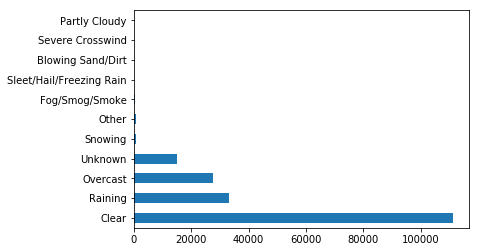

In [19]:
#visualizing weather condition types
wdf.plot(kind='barh')

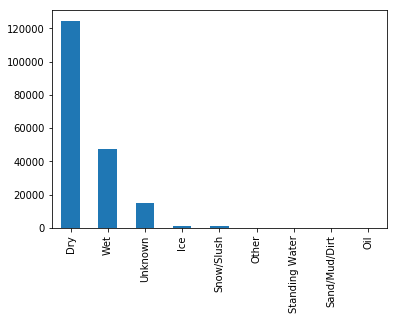

In [20]:
#visualizing road condition types
rdf.plot(kind='bar')

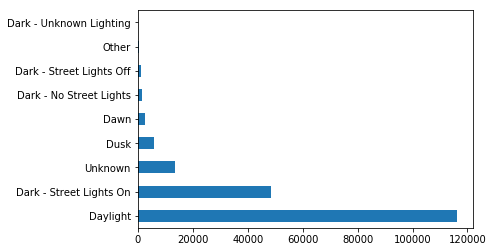

In [21]:
#visualizing light condition types
ldf.plot(kind='barh')

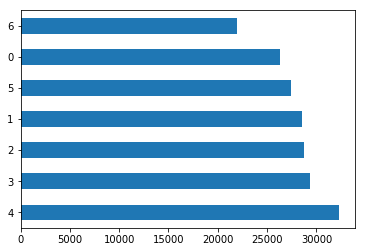

In [22]:
#visualizing day of week types
ddf.plot(kind='barh')

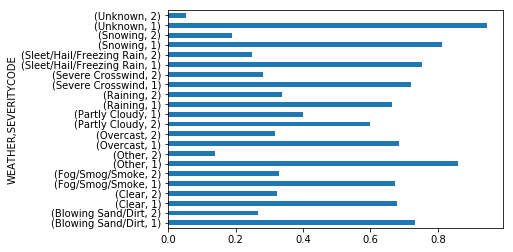

In [23]:
#visualizing weather and severity code
swdf.plot(kind='barh')

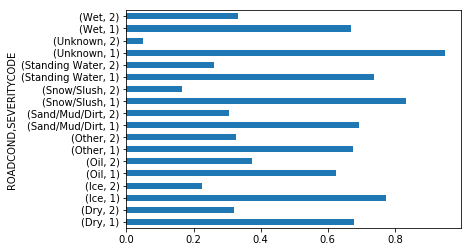

In [24]:
#visualizing road condition and severity code
srdf.plot(kind='barh')

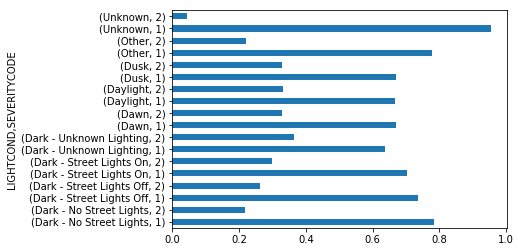

In [25]:
#visualizing light condition and severity code
sldf.plot(kind='barh')

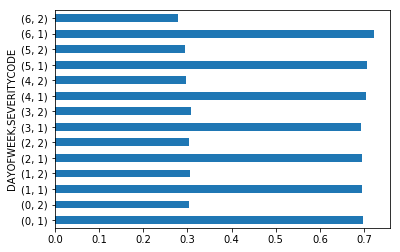

In [26]:
#visualizing day of week and severity code
sddf.plot(kind='barh')

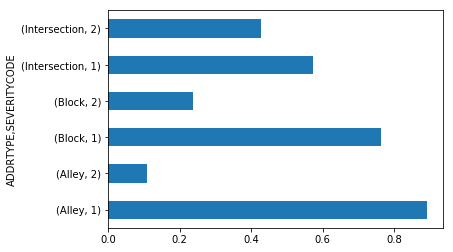

In [28]:
#visualizing addresstype and severity code
sadf.plot(kind='barh')

In [29]:
#creating sets
cf=df1[['DAYOFWEEK']]
cf = pd.concat([cf,pd.get_dummies(df['ADDRTYPE']),pd.get_dummies(df['WEATHER']),pd.get_dummies(df['ROADCOND']),pd.get_dummies(df['LIGHTCOND'])], axis=1)
cf.head()

,DAYOFWEEK,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [30]:
X = cf
y = df1["SEVERITYCODE"].values
#creating and splitting data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.90)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19467, 33) (19467,)
Test set: (175206, 33) (175206,)


In [31]:
#K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
k=17
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [32]:
#knn prediction
knn_pred=knn.predict(X_test)
knn_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [33]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=7)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
#decision tree prediction
dt_pred=dt.predict(X_test)
dt_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=6,solver="liblinear")
lr.fit(X_train,y_train)

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
#logistic regression prediction
lr_pred=lr.predict(X_test)
lr_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn import metrics

KNN EVALUATION

In [38]:
jaccard_similarity_score(y_test,knn_pred)

0.6733045671951874

In [39]:
f1_score(y_test,knn_pred,average='macro')

0.5546386208266927

In [40]:
metrics.accuracy_score(y_test,knn_pred)

0.6733045671951874

DECISION TREE EVALUATION

In [41]:
jaccard_similarity_score(y_test,dt_pred)

0.700815040580802

In [43]:
f1_score(y_test,dt_pred,average='macro')

0.41989848991894263

In [44]:
metrics.accuracy_score(y_test,dt_pred)

0.700815040580802

LOGISTIC REGRESSION EVALUATION

In [46]:
jaccard_similarity_score(y_test,lr_pred)

0.7012316929785509

In [47]:
f1_score(y_test,lr_pred,average='macro')

0.4129853558462399

In [48]:
metrics.accuracy_score(y_test,lr_pred)

0.7012316929785509

<h1>RESULTS</h1>

Algorithm	        Jaccard	 F1-score	Accuracy
KNN	                0.69	 0.48	    0.69<br>
Decision Tree       0.69     0.41	    0.69<br>
LogisticRegression	0.70	 0.41	    0.70